<빅데이터 분석 기획>
--

Mall_Customers
--

In [ ]:
from google.colab import files
files.upload()

In [2]:
import pandas as pd
mall=pd.read_csv('Mall_Customers.csv')

In [3]:
mall.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
mall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
mall.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [9]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

le.fit(mall.Gender)
mall.Gender=le.fit_transform(mall.Gender)

In [10]:
import warnings
warnings.filterwarnings('ignore')

1번문제: [하] 각 속성의 통계량을 확인하고 해석하시오.
--

In [21]:
mall

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


In [26]:
for i in range(0,5):
    print(len(mall.iloc[:, i].unique()))

200
2
51
64
84


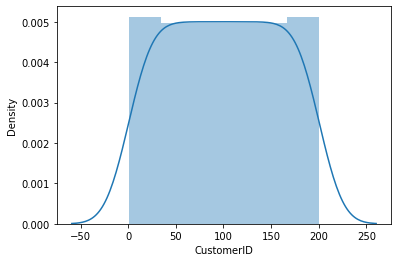

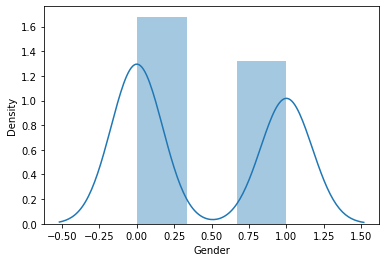

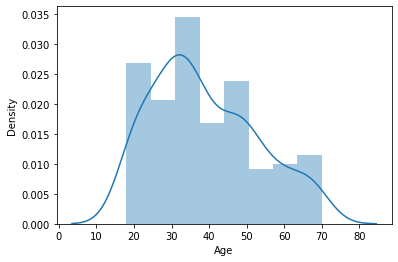

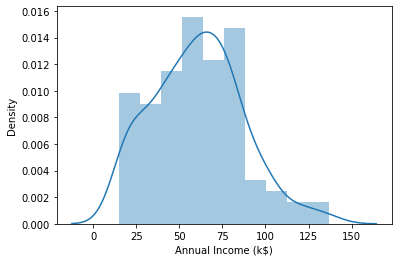

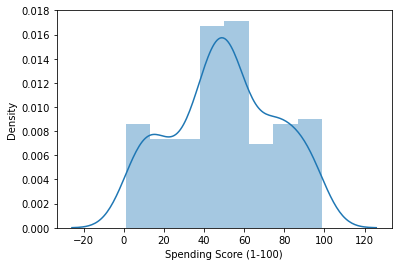

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

for i in range(0,5):
    sns.distplot(mall.iloc[:, i])
    plt.show()
    i+=1

In [28]:
mall.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


[Text(0, 0.5, 'Spending Score (1-100)'),
 Text(0.5, 1.0, 'Spending Score (1-100)')]

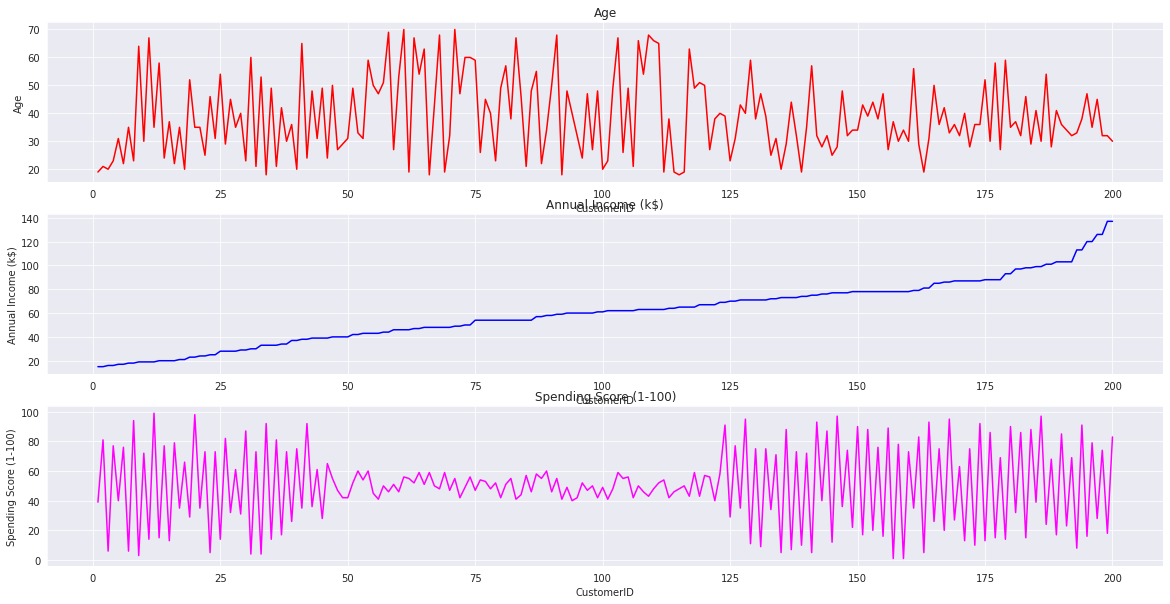

In [35]:
figure, ((ax1),(ax2),(ax3)) = plt.subplots(nrows=3, ncols=1)
figure.set_size_inches(20,10)

sns.lineplot(data=mall, x='CustomerID', y='Age', ax=ax1, color='red')

sns.lineplot(data=mall, x='CustomerID', y='Annual Income (k$)', ax=ax2, color='blue')

sns.lineplot(data=mall, x='CustomerID', y='Spending Score (1-100)', ax=ax3, color='magenta')

sns.set_style('darkgrid')
ax1.set(ylabel="Age", title="Age")
ax2.set(ylabel="Annual Income (k$)", title="Annual Income (k$)")
ax3.set(ylabel="Spending Score (1-100)", title="Spending Score (1-100)")

customerID가 뒤로 갈수록 Annual Income (k$)가 상승하는 것을 볼 수 있다.
--

그렇다면 소득에 따른 나머지 분포는 어떨까?
--

In [36]:
mall.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


[Text(0, 0.5, 'Spending Score (1-100)'), Text(0.5, 1.0, 'Annual Income (k$)')]

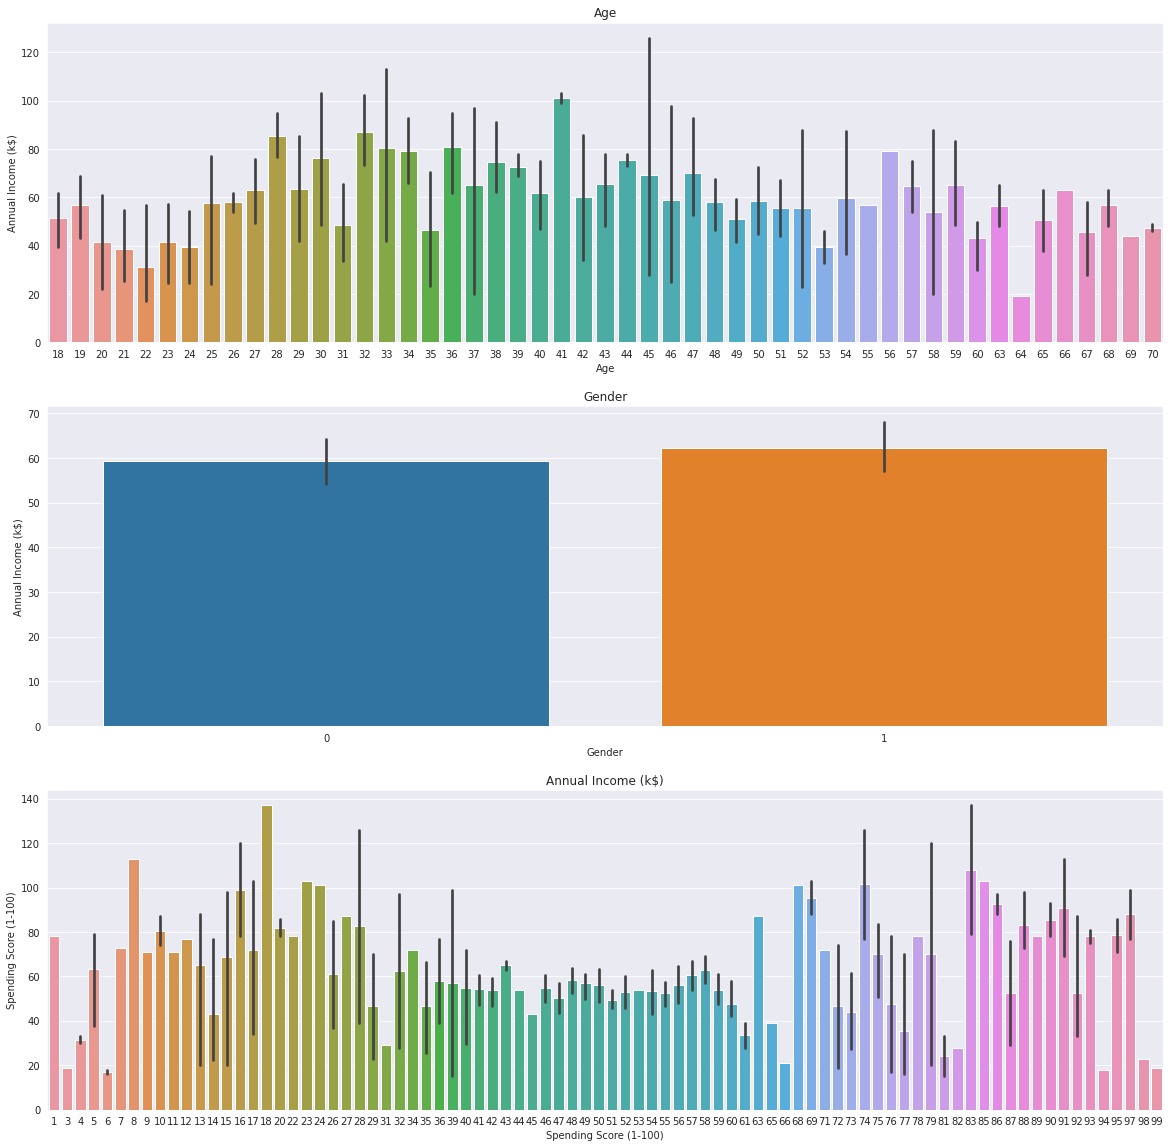

In [44]:
figure, ((ax1),(ax2),(ax3)) = plt.subplots(nrows=3, ncols=1)
figure.set_size_inches(20,20)

sns.barplot(data=mall, x='Age', y='Annual Income (k$)', ax=ax1)

sns.barplot(data=mall, x='Gender', y='Annual Income (k$)', ax=ax2)

sns.barplot(data=mall, x='Spending Score (1-100)',y='Annual Income (k$)',  ax=ax3)

sns.set_style('darkgrid')
ax1.set(ylabel="Annual Income (k$)", title="Age")
ax2.set(ylabel="Annual Income (k$)", title="Gender")
ax3.set(ylabel="Spending Score (1-100)", title="Annual Income (k$)")

소득의 경우 남성과 여성의 차이가 있긴하지만 그 차이가 매우 크다라고 보기는 어려워 보이며, Spending Score의 경우에도 커질수록 소득이 반드시 정비례해서 올라간다고 보기는 어려워 보인다.

성별로 보기
--

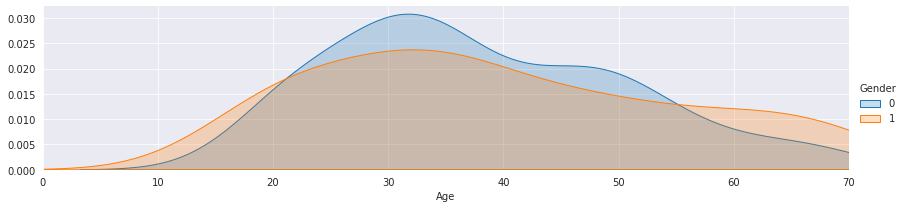

In [47]:
facet = sns.FacetGrid(mall, hue ='Gender', aspect=4)
facet.map(sns.kdeplot,'Age',shade = True) # kde : 이차원 밀집도 그래프
facet.set(xlim=(0,mall['Age'].max()))
facet.add_legend()
sns.axes_style('dark')

plt.show()

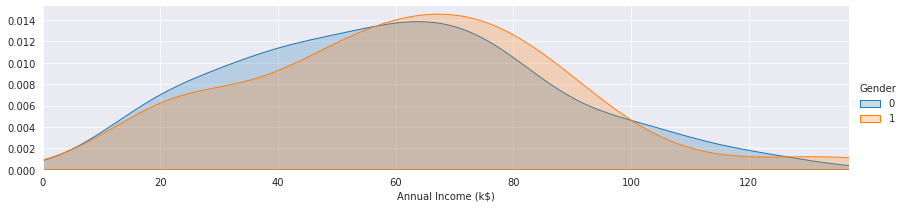

In [48]:
facet = sns.FacetGrid(mall, hue ='Gender', aspect=4)
facet.map(sns.kdeplot,'Annual Income (k$)',shade = True) # kde : 이차원 밀집도 그래프
facet.set(xlim=(0,mall['Annual Income (k$)'].max()))
facet.add_legend()
sns.axes_style('dark')

plt.show()

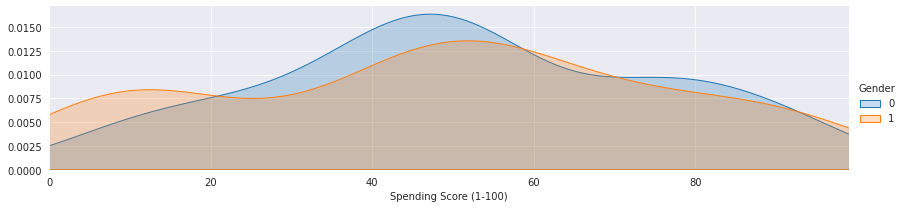

In [49]:
facet = sns.FacetGrid(mall, hue ='Gender', aspect=4)
facet.map(sns.kdeplot,'Spending Score (1-100)',shade = True) # kde : 이차원 밀집도 그래프
facet.set(xlim=(0,mall['Spending Score (1-100)'].max()))
facet.add_legend()
sns.axes_style('dark')

plt.show()

연령별로 binnig 해서 살펴보기
--

In [57]:
mall['Age'].max(), mall['Age'].min()

(70, 18)

In [54]:
mall['Age_range']=0

In [58]:
error_list=[]
for i in range(0,200):
    age=mall.iloc[i, 2]
    if age<20:
        mall['Age_range'][i]=10
    elif age<30:
        mall['Age_range'][i]=20
    elif age<40:
        mall['Age_range'][i]=30
    elif age<50:
        mall['Age_range'][i]=40
    elif age<60:
        mall['Age_range'][i]=50
    elif age<70:
        mall['Age_range'][i]=60
    elif age<80:
        mall['Age_range'][i]=70
    else:
        error_list.append(i)

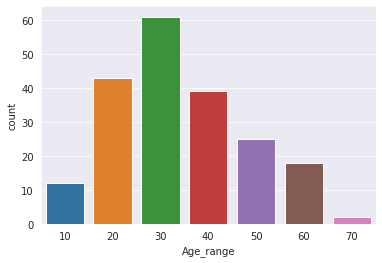

In [65]:
sns.countplot(mall.Age_range)

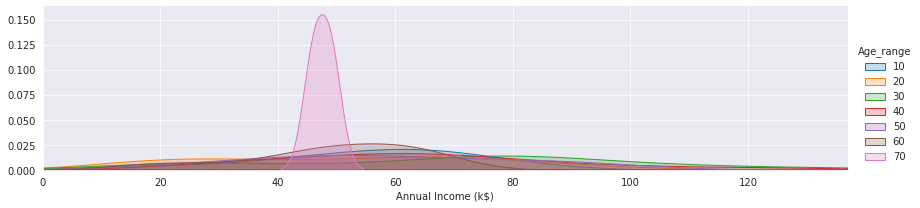

In [64]:
facet = sns.FacetGrid(mall, hue ='Age_range', aspect=4)
facet.map(sns.kdeplot, 'Annual Income (k$)',shade = True) # kde : 이차원 밀집도 그래프
facet.set(xlim=(0,mall['Annual Income (k$)'].max()))
facet.add_legend()
sns.axes_style('dark')

plt.show()

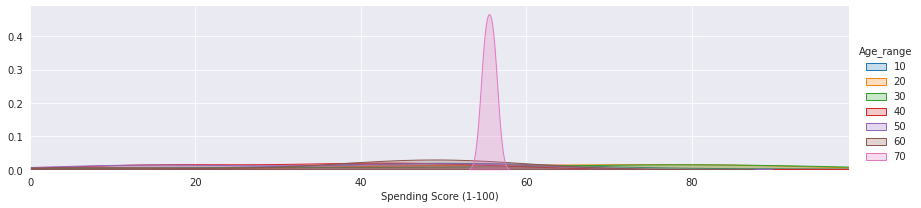

In [72]:
facet = sns.FacetGrid(mall, hue ='Age_range', aspect=4)
facet.map(sns.kdeplot,'Spending Score (1-100)',shade = True) # kde : 이차원 밀집도 그래프
facet.set(xlim=(0,mall['Spending Score (1-100)'].max()))
facet.add_legend()
sns.axes_style('dark')

plt.show()

[Text(0, 0.5, 'Spending Score (1-100)'),
 Text(0.5, 1.0, 'Spending Score (1-100)')]

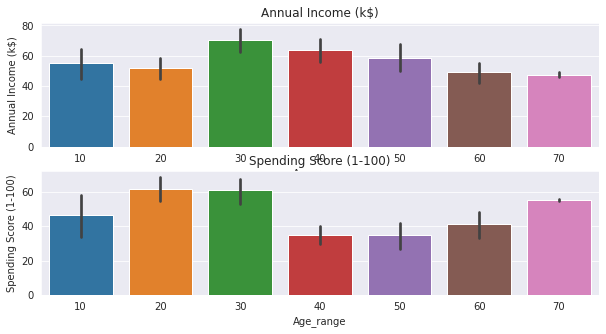

In [71]:
figure, ((ax1),(ax2)) = plt.subplots(nrows=2, ncols=1)
figure.set_size_inches(10,5)

sns.barplot(data=mall, x='Age_range', y='Annual Income (k$)', ax=ax1)

sns.barplot(data=mall, x='Age_range', y='Spending Score (1-100)', ax=ax2)

sns.set_style('darkgrid')
ax1.set(ylabel="Annual Income (k$)", title="Annual Income (k$)")
ax2.set(ylabel="Spending Score (1-100)", title="Spending Score (1-100)")

종합으로 보기
--

In [74]:
mall.drop(['Age_range'], axis=1, inplace=True)

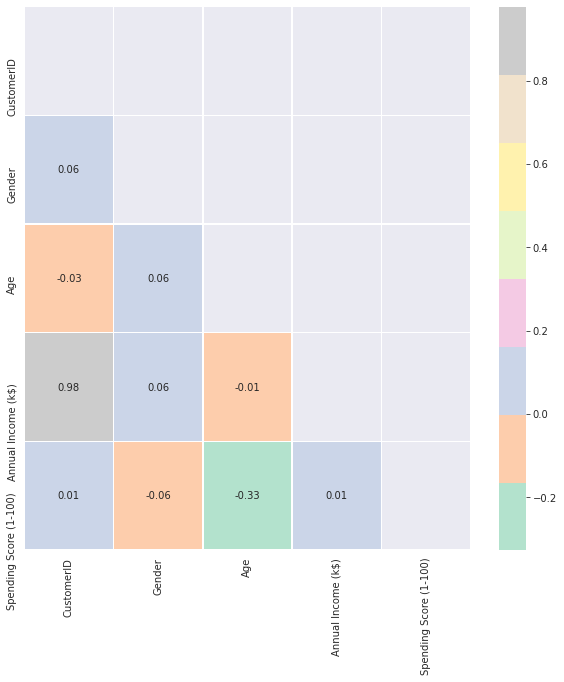

In [76]:
import numpy as np
plt.figure(figsize=(10,10))
mask = np.zeros_like(mall.corr(), dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data=mall.corr(), mask=mask, annot=True, fmt ='.2f', linewidths=.5, cmap='Pastel2')
plt.show()

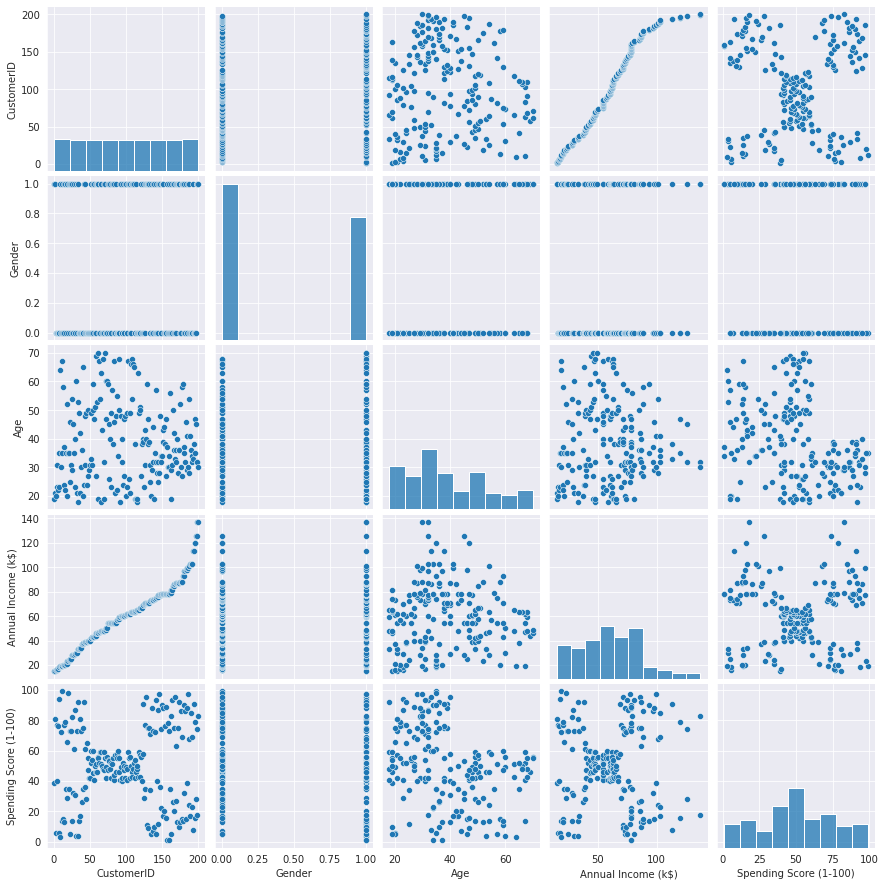

In [77]:
sns.pairplot(mall)

2번 문제: [상] 적합도검정(goodness of fir test)를 해보고 결과를 해석하시오.
--



적합도 검정이란? 관측값(빈도)뜰이 어떤 특정한 분포를 따르고 있는지 검정 (빈도수와 기대도수를 이용)

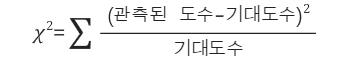

귀무가설: Annual Income (k$)과 Spending Score(1-100)의 모집단의 성질이 같다.

대립가설:  Annual Income (k$)과 Spending Score(1-100)의 모집단의 성질이 다르다.

In [79]:
mall

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


In [ ]:
!pip install researchpy

In [82]:
from scipy.stats import chi2
from scipy.stats import chisquare
import researchpy as rp

In [94]:
observed=mall['Annual Income (k$)']
expected=mall['Spending Score (1-100)']

In [95]:
chi_squared_test=(observed-expected).pow(2)/expected

In [96]:
chi_squared_statistic=chi_squared_test.sum()
chi_squared_statistic

27598.658632086295

In [97]:
dof=200-2 # (n-2) 자유도

In [98]:
chi_=chi2(dof)

In [99]:
chi_05=chi_.ppf(0.95)

In [100]:
chi_05

231.82916671052752

In [101]:
if chi_squared_statistic >= chi_05:
    print("귀무가설 기각")
else:
    print("귀무가설 채택")

귀무가설 기각


- 이에 따라 Annual Income (k$)과 Spending Score(1-100)의 모집단의 성질이 다르다고 할 수 있다.

In [102]:
p_val=1-chi_.cdf(chi_squared_statistic)
p_val

0.0

In [104]:
chisquare(observed.values,f_exp = expected.values)

Power_divergenceResult(statistic=27598.658632086295, pvalue=0.0)

3번 문제: Age와 Spending Score를 corrlation 점수로 plot 하시오(seaborn을 이용하시오.)
--

In [105]:
cor=mall[['Age', 'Spending Score (1-100)']]

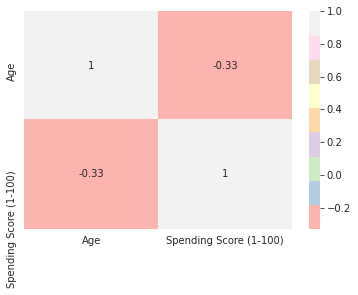

In [108]:
sns.heatmap(data=cor.corr(), annot=True, cmap='Pastel1')

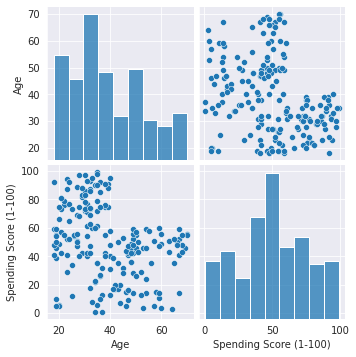

In [109]:
sns.pairplot(cor)

4번 문제: K-mean을 Eblow method을 적용하고 결과를 해석하시오.
--

KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f81259f0e10>,
                 k=None, metric=None, model=None, timings=True)

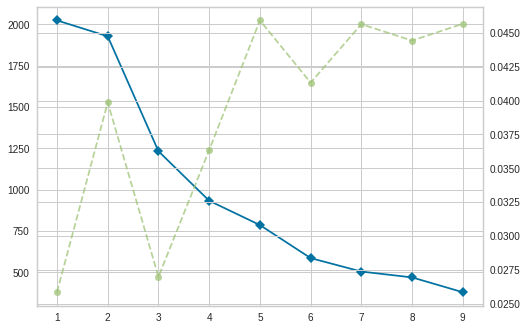

In [114]:
from yellowbrick.base import Visualizer
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
np_mall=np.array(mall)
model=KMeans()
visualizer=KElbowVisualizer(model, k=(1,10))
visualizer.fit(np_mall.reshape(-1,1))

- 파란색이 그룹의 변동성을 확인하는 지표이다. 군집이 증가할 때마다, 변동성이 급감하는 것을 볼 수 있따.

- 녹색 점선은 군집을 학습하는데 걸리는 시간으로, 4개, 9개일때 가장 오래 걸리고, 군집이 3개일때 가장 적게 걸린다.

In [ ]:
!pip install mglearn

In [119]:
import mglearn

9개의 군집으로 시각화해서 보기

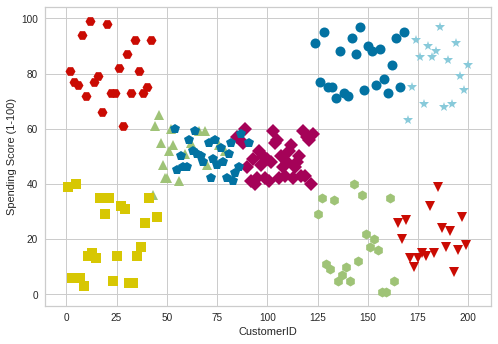

In [132]:
kmeans = KMeans(n_clusters=9)
kmeans.fit(mall)
assignments = kmeans.labels_

mglearn.discrete_scatter(mall.iloc[:, 0], mall.iloc[:, 4], assignments)
plt.xlabel("CustomerID")
plt.ylabel("Spending Score (1-100)")
plt.show()

- custimer ID와 Spending Score

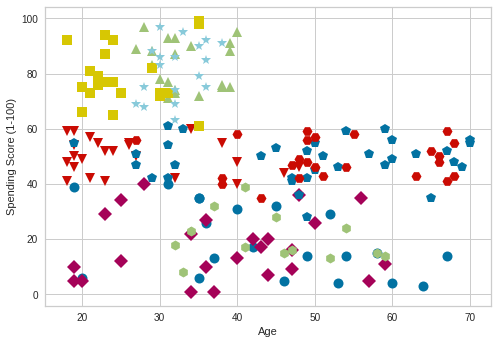

In [136]:
kmeans = KMeans(n_clusters=9)
kmeans.fit(mall)
assignments = kmeans.labels_

mglearn.discrete_scatter(mall.iloc[:, 2], mall.iloc[:, 4], assignments)
plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")
plt.show()

- Age 와 Spending Score

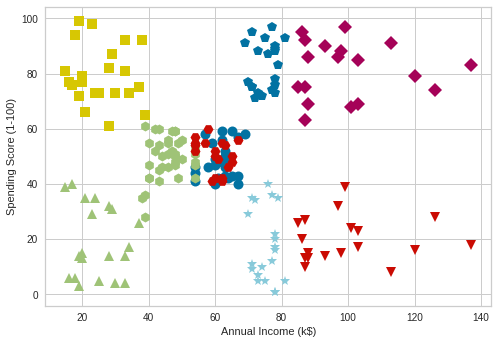

In [129]:
kmeans = KMeans(n_clusters=9)
kmeans.fit(mall)
assignments = kmeans.labels_

mglearn.discrete_scatter(mall.iloc[:, 3], mall.iloc[:, 4], assignments)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()

5번 문제: DBSCAN을 적용하고 결과를 해석하시오.
--

DBSCAN는 밀도 방식의 클러스터링을 사용한다.

밀도가 높은 부분을 클러스터링 하는 방식이다.

In [146]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN()
clusters = dbscan.fit_predict(mall)
print("클러스터 레이블:\n", clusters)

클러스터 레이블:
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1]


In [147]:
mall

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


In [148]:
x=mall.drop(['Spending Score (1-100)'], axis=1)
y=mall['Spending Score (1-100)']

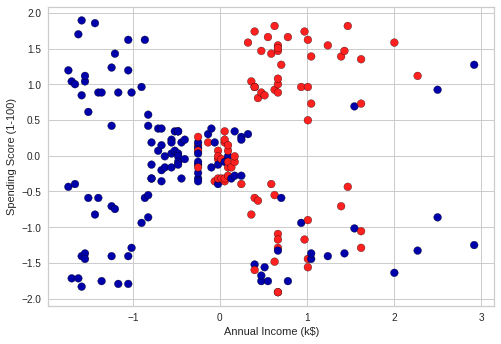

In [149]:
from sklearn.preprocessing import StandardScaler 
from sklearn.impute import SimpleImputer

# 평균이 0, 분산이 1이 되도록 데이터의 스케일을 조정합니다
scaler = StandardScaler()
scaler.fit(x)
x_scaled = scaler.transform(x)

y=np.array(y)
y=y.reshape(-1,1)
imp=SimpleImputer()
imp.fit_transform(y)
scaler.fit(y)
y_scaled=scaler.transform(y)


dbscan = DBSCAN()
clusters = dbscan.fit_predict(x_scaled)
# 클러스터 할당을 표시합니다
plt.scatter(x_scaled[:, 3], y_scaled[:, 0], c=clusters, cmap=mglearn.cm2, s=60, edgecolors='black')
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()

- DBSCAN을 사용하여 군집화 한 방식

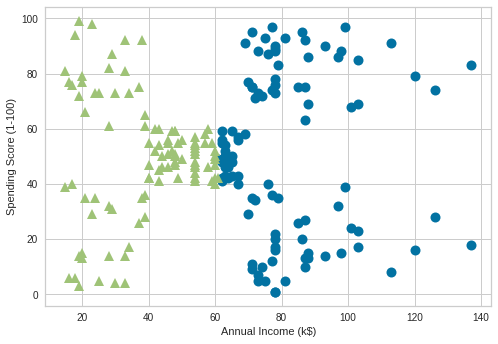

In [155]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(mall)
assignments = kmeans.labels_

mglearn.discrete_scatter(mall.iloc[:, 3], mall.iloc[:, 4], assignments)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()

- K-means을 사용하여 군집화 한 방식

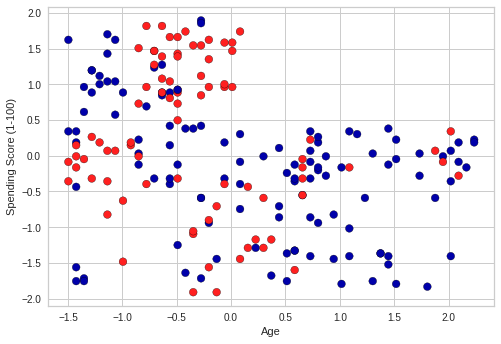

In [150]:
plt.scatter(x_scaled[:, 2], y_scaled[:, 0], c=clusters, cmap=mglearn.cm2, s=60, edgecolors='black')
plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")
plt.show()

- DBSCAN을 사용하여 군집화 한 방식

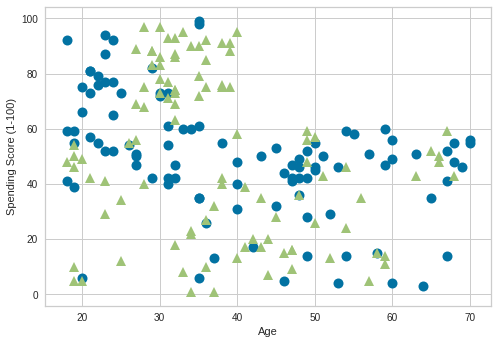

In [156]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(mall)
assignments = kmeans.labels_

mglearn.discrete_scatter(mall.iloc[:, 2], mall.iloc[:, 4], assignments)
plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")
plt.show()

- K-means을 사용하여 군집화 한 방식

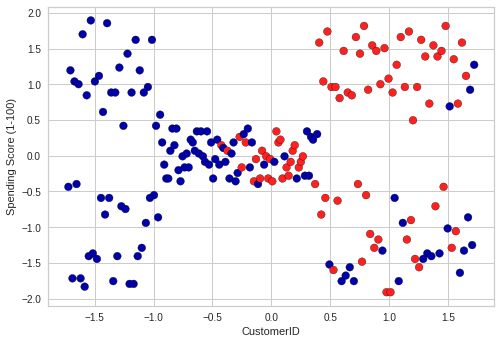

In [153]:
plt.scatter(x_scaled[:, 0], y_scaled[:, 0], c=clusters, cmap=mglearn.cm2, s=60, edgecolors='black')
plt.xlabel("CustomerID")
plt.ylabel("Spending Score (1-100)")
plt.show()

- DBSCAN을 사용하여 군집화 한 방식

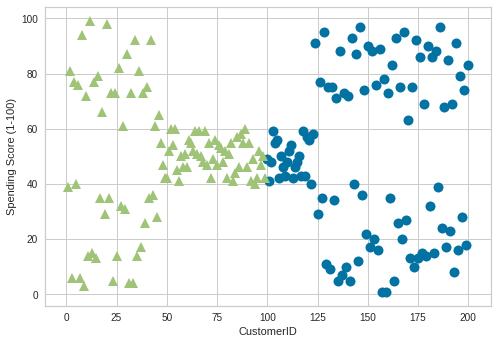

In [158]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(mall)
assignments = kmeans.labels_

mglearn.discrete_scatter(mall.iloc[:, 0], mall.iloc[:, 4], assignments)
plt.xlabel("CustomerID")
plt.ylabel("Spending Score (1-100)")
plt.show()

- K-means을 사용하여 군집화 한 방식

min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


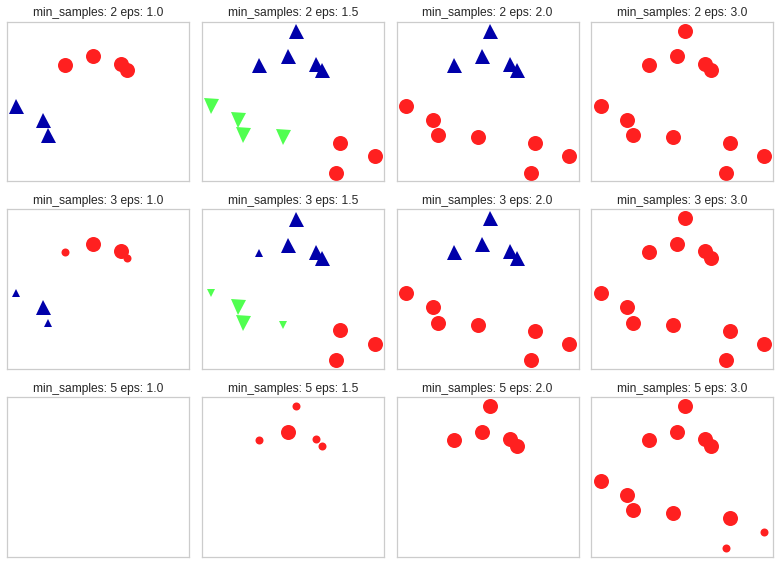

In [154]:
mglearn.plots.plot_dbscan()

전반적으로 K-means와 DBSCAN을 둘 다 사용한 결과, DBSCAN의 장점은 K-means와 같이 클러스터의 수를 정하지 않아도 되며, 클러스터의 밀도에 따라서 클러스터를 서로 연결하기 때문에 기하학적인 모양을 갖는 군집도 잘 찾을 수 있는데도 불구하고,

k-means가 군집을 더 잘하는 것으로 보여진다고 할 수 있다.